In [210]:
# Required: Import packages
import json
import pandas as pd
from PIL import Image
import numpy as np

# 0. Load and Clean Data

In [211]:
# Required: Load labels json file containing image object labels

with open('../Data/bdd100k/labels/bdd100k_labels_images_train.json') as json_file:
    train_data = json.load(json_file)

with open('../Data/bdd100k/labels/bdd100k_labels_images_val.json') as json_file:
    test_data = json.load(json_file)

In [212]:
# Required: Normalize semi-structured JSON data into a pd dataframe
data_normalized = pd.json_normalize(train_data)
test_data_normalized = pd.json_normalize(test_data)
type(data_normalized)

pandas.core.frame.DataFrame

In [213]:
# Optional - Testing only -- check number of images 
data_normalized.shape

(69863, 6)

In [214]:
# Optional - Testing only -- check format and contents of df
data_normalized.head()

,name,timestamp,labels,attributes.weather,attributes.scene,attributes.timeofday
0,0000f77c-6257be58.jpg,10000,"[{'category': 'traffic light', 'attributes': {...",clear,city street,daytime
1,0000f77c-62c2a288.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,dawn/dusk
2,0000f77c-cb820c98.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,residential,dawn/dusk
3,0001542f-5ce3cf52.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,city street,night
4,0001542f-7c670be8.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,night


In [215]:
# Optional - Testing only -- check the df values corresponding to a specific image file name
data_normalized[data_normalized['name'] == '0a0a0b1a-7c39d841.jpg']


,name,timestamp,labels,attributes.weather,attributes.scene,attributes.timeofday
3915,0a0a0b1a-7c39d841.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime


In [216]:
# Optional - Testing only -- check what format the "labels" contains
type(data_normalized[data_normalized['name'] == '0a0a0b1a-7c39d841.jpg'].labels)
data_normalized.iloc[3915].labels

[{'category': 'car',
  'attributes': {'occluded': True,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 555.647397,
   'y1': 304.228432,
   'x2': 574.015906,
   'y2': 316.474104},
  'id': 109344},
 {'category': 'car',
  'attributes': {'occluded': True,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 554.116689,
   'y1': 318.004813,
   'x2': 567.89307,
   'y2': 328.719775},
  'id': 109345},
 {'category': 'car',
  'attributes': {'occluded': True,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 523.502507,
   'y1': 311.881977,
   'x2': 544.932435,
   'y2': 327.189068},
  'id': 109346},
 {'category': 'car',
  'attributes': {'occluded': True,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1'

In [217]:
# Check size of test and validation data for conditions clear, highway, and daytime.
train_shape = data_normalized[(data_normalized['attributes.weather'] == "clear") & 
               (data_normalized['attributes.scene'] == "highway") & 
               (data_normalized['attributes.timeofday'] == "daytime")].shape

test_shape = test_data_normalized[(test_data_normalized['attributes.weather'] == "clear") & 
               (test_data_normalized['attributes.scene'] == "highway") & 
               (test_data_normalized['attributes.timeofday'] == "daytime")].shape

In [218]:
# Print out number of images in train and test datasets

print("Train Data: We get a total of %d images taken during clear weather, highway, and daytime." %train_shape[0])
print("Test Data: We get a total of %d images taken during clear weather, highway, and daytime." %test_shape[0])
print("Test data composes of %.2f%% of total dataset" %(100*test_shape[0]/(test_shape[0]+train_shape[0])))

Train Data: We get a total of 3575 images taken during clear weather, highway, and daytime.
Test Data: We get a total of 514 images taken during clear weather, highway, and daytime.
Test data composes of 12.57% of total dataset


# 1. Determine number of objects in the image

In [219]:
# REQUIRED: Function used to clean data, extract labels, and extract data for sunny, 
# highway, and daytime conditions

def clean_data(data_normalized):
    # Initialize lists of object types. Each list will contain 69863 values, each of which corresponds to an image specified as a row in data_cleaned 
    num_objects = []
    num_road = []
    num_sidewalk = []
    num_building = []
    num_wall = []
    num_fence = []
    num_pole = []
    num_traffic_light = []
    num_traffic_sign = []
    num_vegetation = []
    num_terrain = []
    num_sky = []
    num_person = []
    num_rider = []
    num_car = []
    num_truck = []
    num_bus = []
    num_train = []
    num_motorcycle = []
    num_bicycle = []
    num_lanes = []
    num_drivable_area = []

    # Iterate through each image in data_normalized, sum up the number of objects corresponding to each object type, and append to
    # the corresponding object list
    for index, row in data_normalized.iterrows():
        num_objects.append(len(row['labels']))
        num_road.append(sum(x['category'] == 'road' for x in row['labels']))
        num_sidewalk.append(sum(x['category'] == 'sidewalk' for x in row['labels']))
        num_building.append(sum(x['category'] == 'building' for x in row['labels']))
        num_wall.append(sum(x['category'] == 'wall' for x in row['labels']))
        num_fence.append(sum(x['category'] == 'fence' for x in row['labels']))
        num_pole.append(sum(x['category'] == 'pole' for x in row['labels']))
        num_traffic_light.append(sum(x['category'] == 'traffic light' for x in row['labels']))
        num_traffic_sign.append(sum(x['category'] == 'traffic sign' for x in row['labels']))
        num_vegetation.append(sum(x['category'] == 'vegetation' for x in row['labels']))
        num_terrain.append(sum(x['category'] == 'terrain' for x in row['labels']))
        num_sky.append(sum(x['category'] == 'sky' for x in row['labels']))
        num_person.append(sum(x['category'] == 'person' for x in row['labels']))
        num_rider.append(sum(x['category'] == 'rider' for x in row['labels']))
        num_car.append(sum(x['category'] == 'car' for x in row['labels']))
        num_truck.append(sum(x['category'] == 'truck' for x in row['labels']))
        num_bus.append(sum(x['category'] == 'bus' for x in row['labels']))
        num_train.append(sum(x['category'] == 'train' for x in row['labels']))
        num_motorcycle.append(sum(x['category'] == 'motorcycle' for x in row['labels']))
        num_bicycle.append(sum(x['category'] == 'bicycle' for x in row['labels']))
        num_lanes.append(sum(x['category'] == 'lane' for x in row['labels']))
        num_drivable_area.append(sum(x['category'] == 'drivable area' for x in row['labels']))

    data_normalized['num_objects'] = num_objects
    data_normalized['num_sidewalk'] = num_sidewalk
    data_normalized['num_building'] = num_building
    data_normalized['num_wall'] = num_wall
    data_normalized['num_fence'] = num_fence
    data_normalized['num_pole'] = num_pole
    data_normalized['num_traffic_light'] = num_traffic_light
    data_normalized['num_traffic_sign'] = num_traffic_sign
    data_normalized['num_vegetation'] = num_vegetation
    data_normalized['num_terrain'] = num_terrain
    data_normalized['num_sky'] = num_sky
    data_normalized['num_person'] = num_person
    data_normalized['num_rider'] = num_rider
    data_normalized['num_car'] = num_car
    data_normalized['num_truck'] = num_truck
    data_normalized['num_bus'] = num_bus
    data_normalized['num_train'] = num_train
    data_normalized['num_motorcycle'] = num_motorcycle
    data_normalized['num_bicycle'] = num_bicycle
    data_normalized['num_lanes'] = num_lanes
    data_normalized['num_drivable_area'] = num_drivable_area

    # Filter only for images where weather == "clear", scene == "highway", and timeofday == "daytime". 
    # Note: A better implementation may be to filter the dataframe prior to counting the objects per image, 
    # but it may be useful to keep the data_normalized and object counts for each image in case we want to use different filtering values.

    data_cleaned = data_normalized[(data_normalized['attributes.weather'] == "clear") & 
                   (data_normalized['attributes.scene'] == "highway") & 
                   (data_normalized['attributes.timeofday'] == "daytime")]
    return data_cleaned

In [220]:
# Required: Filter only for images where weather == "clear", scene == "highway", and timeofday == "daytime". 
# Note: A better implementation may be to filter the dataframe prior to counting the objects per image, 
# but it may be useful to keep the data_normalized and object counts for each image in case we want to use different filtering values.

# Clean Training & Validation Data
training_data_cleaned = clean_data(data_normalized)
training_data_cleaned

,name,timestamp,labels,attributes.weather,attributes.scene,attributes.timeofday,num_objects,num_sidewalk,num_building,num_wall,...,num_person,num_rider,num_car,num_truck,num_bus,num_train,num_motorcycle,num_bicycle,num_lanes,num_drivable_area
10,00067cfb-caba8a02.jpg,10000,"[{'category': 'traffic light', 'attributes': {...",clear,highway,daytime,29,0,0,0,...,0,0,3,0,1,0,0,0,11,3
62,002d290d-89f4e5c0.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,23,0,0,0,...,0,0,6,0,0,1,0,0,10,2
88,003baca5-aab2e274.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,6,0,0,0,...,0,0,2,0,0,0,0,0,1,1
89,003baca5-ad660439.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,15,0,0,0,...,0,0,10,1,0,0,0,0,2,1
92,003e23ee-07d32feb.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,28,0,0,0,...,0,0,6,1,1,0,0,0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69675,b18cb922-e3af77af.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,18,0,0,0,...,0,0,5,0,0,0,0,0,9,2
69805,fde2db45-f6e2fbd1.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,11,0,0,0,...,0,0,4,0,0,0,0,0,6,1
69809,fde816b0-1b0f1a85.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,29,0,0,0,...,0,0,8,0,0,0,0,0,9,2
69812,fdebe7ab-8409a734.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,40,0,0,0,...,0,0,12,0,0,0,0,0,8,2


# 1.5 Testing

In [221]:
# Clean Test Data
test_data_cleaned = clean_data(test_data_normalized)
test_data_cleaned

,name,timestamp,labels,attributes.weather,attributes.scene,attributes.timeofday,num_objects,num_sidewalk,num_building,num_wall,...,num_person,num_rider,num_car,num_truck,num_bus,num_train,num_motorcycle,num_bicycle,num_lanes,num_drivable_area
13,b1cebfb7-284f5117.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,21,0,0,0,...,0,0,11,3,0,0,0,0,6,1
40,b1d7b3ac-5af8623b.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,20,0,0,0,...,0,0,8,0,1,0,0,0,2,1
55,b1df722f-57d21f3f.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,25,0,0,0,...,0,0,8,3,0,0,0,0,9,4
56,b1df722f-5bcc3db7.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,38,0,0,0,...,0,4,12,1,0,0,0,0,9,5
67,b1e8ad72-c3c79240.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,30,0,0,0,...,0,0,7,0,0,0,0,0,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,c9e7c9d4-18d31194.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,34,0,0,0,...,0,0,19,2,0,0,0,0,9,4
9838,ca077fe9-d2cf4446.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,19,0,0,0,...,0,0,3,0,0,0,0,0,6,2
9858,ca146661-7f70d0c4.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,37,0,0,0,...,0,0,18,0,0,0,0,0,9,3
9897,ca2bcf0e-69e964d2.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,29,0,0,0,...,0,0,13,0,0,0,0,0,7,3


In [222]:
# Split training dataset to training and validation

training_data_split = training_data_cleaned.sample(frac = 0.9)
val_data_split = training_data_cleaned.drop(training_data_split.index)
val_data_split

,name,timestamp,labels,attributes.weather,attributes.scene,attributes.timeofday,num_objects,num_sidewalk,num_building,num_wall,...,num_person,num_rider,num_car,num_truck,num_bus,num_train,num_motorcycle,num_bicycle,num_lanes,num_drivable_area
105,004855fc-ff3946ad.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,18,0,0,0,...,3,0,8,0,0,0,0,0,4,2
115,0049e5b8-afda7206.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,36,0,0,0,...,0,0,10,0,0,0,0,0,15,5
159,006fdb67-f4820206.jpg,10000,"[{'category': 'bus', 'attributes': {'occluded'...",clear,highway,daytime,40,0,0,0,...,5,0,9,0,1,0,0,0,6,2
203,0081e27b-17bf4a9e.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,31,0,0,0,...,0,0,19,1,0,0,0,0,6,4
1259,03641c88-f519c8f8.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,23,0,0,0,...,0,0,11,0,0,0,0,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68316,ae55d558-4b7bf95f.jpg,10000,"[{'category': 'traffic light', 'attributes': {...",clear,highway,daytime,38,0,0,0,...,5,1,9,1,1,0,0,0,5,1
68985,afe7c43b-998729a8.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,45,0,0,0,...,0,0,20,0,1,0,0,0,12,4
69163,b0521762-565e20cd.jpg,10000,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,daytime,33,0,0,0,...,0,0,16,0,0,0,0,0,8,3
69398,b0e4e52c-4b120046.jpg,10000,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,daytime,18,0,0,0,...,0,0,5,0,0,0,0,0,8,2


In [223]:
training_data_split['name']

35681    5ab1916f-484d7c02.jpg
48639    7c4d90f7-27f0212d.jpg
36901    5de8f675-a9e387f9.jpg
31810    514a6d58-0790e0cd.jpg
52979    87a9cad2-e7ef8a6f.jpg
                 ...          
13503    225646cd-d717542d.jpg
51843    84aaacab-4ca794e8.jpg
36994    5e26f49d-d2f3631d.jpg
43924    705c3239-d8f73138.jpg
21164    35f95308-1c160fa3.jpg
Name: name, Length: 3218, dtype: object

In [224]:
val_data_split['name']

105      004855fc-ff3946ad.jpg
115      0049e5b8-afda7206.jpg
159      006fdb67-f4820206.jpg
203      0081e27b-17bf4a9e.jpg
1259     03641c88-f519c8f8.jpg
                 ...          
68316    ae55d558-4b7bf95f.jpg
68985    afe7c43b-998729a8.jpg
69163    b0521762-565e20cd.jpg
69398    b0e4e52c-4b120046.jpg
69512    b11da8cd-f3134c04.jpg
Name: name, Length: 357, dtype: object

In [ ]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move training and validation files to a separate folder. 

import os
import shutil

source = '../Data/bdd100k/bdd100k/images/100k/train/'
destination = '../Data/bdd100k/bdd100k/images/100k/train_clean/'

for f in training_data_split['name']:
    origin = source + f
    dest = destination + f
    shutil.move(origin, dest)


In [ ]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move cleaned validation dataset to new folder
import shutil
source = '../Data/bdd100k/bdd100k/images/100k/train/'
destination = '../Data/bdd100k/bdd100k 2/images/100k/val_clean/'

for f in val_data_split['name']:
    origin = source + f
    dest = destination + f
    shutil.move(origin, dest)

In [232]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move cleaned test dataset to new folder

source = '../Data/bdd100k/bdd100k/images/100k/val/'
destination = '../Data/bdd100k/bdd100k 2/images/100k/test_clean/'

for f in test_data_cleaned['name']:
    origin = source + f
    dest = destination + f
    shutil.move(origin, dest)
    

In [39]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move masks training files to a separate folder. 

source = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/train/'
destination = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/train_clean/'

for f in training_data_split['name']:
    origin = source + f[:-3] + 'png'
    dest = destination + f[:-3] + 'png'
    shutil.move(origin, dest)

In [41]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move masks validation files to a separate folder. 

source = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/train/'
destination = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/val_clean/'

for f in val_data_split['name']:
    origin = source + f[:-3] + 'png'
    dest = destination + f[:-3] + 'png'
    shutil.move(origin, dest)

In [42]:
# REQUIRED - ONE TIME ONLY - ONLY PERFORM THIS STEP ONCE
# Move masks test files to a separate folder. 

source = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/val/'
destination = '../Data/bdd100k/bdd100k 3/labels/drivable/masks/test_clean/'

for f in test_data_cleaned['name']:
    origin = source + f[:-3] + 'png'
    dest = destination + f[:-3] + 'png'
    shutil.move(origin, dest)

# 2. Image ingestion and preprocessing

In [154]:
# create function to upload image as np arrays
import cv2
from PIL import Image

def image_upload(h, d, ch, image_folder_path, mask_folder_path, image_path):
    
    X = np.empty(shape = (len(image_path), h, d, ch), dtype = 'float32')
    y = np.empty(shape = (len(image_path), h, d, ch), dtype = 'float32')
    defaults = (('<pad>', 0), 'O')
    i = 0
    
    for f in image_path:
        
        #need to account for the ext of mask images being .png
        f_temp = f
        f_temp = f_temp[:-4]
        f_png = (f_temp + '.png')
        
        image = cv2.imread(image_folder_path+f, cv2.IMREAD_COLOR)
        mask = cv2.imread(mask_folder_path+f_png, cv2.IMREAD_COLOR)
 
        X[i] = image
        y[i] = mask
        i+=1
    

#     image_data = cv2.resize(X[j], (128,128))
#     mask_data = cv2.resize(y[j], (128,128)) 
    
#     image_data = image_data[np.newaxis,:,:,:]
#     mask_data = mask_data[np.newaxis,:,:,:]    
        
        
       # tmp = resize(X_train[i], (150,150))
        
    return X, y

# create function to resize image

def image_resize(X, y):
    
    image_data = np.empty(shape = (len(X), 128, 128, 3), dtype = 'float32')
    mask_data = np.empty(shape = (len(y), 128, 128, 3), dtype = 'float32')
    
    for i in range(len(image_data)):
        image = cv2.resize(X[i], (128,128))
        mask = cv2.resize(y[i], (128,128))
    
        image_data[i] = image 
        mask_data[i] = mask 

    return image_data, mask_data

In [26]:
# importing the training data

train_data, train_mask = image_upload(h = 720, d = 1280, ch = 3, 
             image_folder_path = "../Data/bdd100k/bdd100k 2/images/100k/train_clean/", 
             mask_folder_path = "../Data/bdd100k/bdd100k 3/labels/drivable/masks/train_clean/", 
             image_path = training_data_split['name'])
# resize the training data
train_data, train_mask = image_resize(train_data, train_mask)

In [365]:
# importing the val data

val_data, val_mask = image_upload(h = 720, d = 1280, ch = 3, 
             image_folder_path = "../Data/bdd100k/bdd100k 2/images/100k/val_clean/", 
             mask_folder_path = "../Data/bdd100k/bdd100k 3/labels/drivable/masks/val_clean/", 
             image_path = val_data_split['name'])
# resize the val data
val_data, val_mask = image_resize(val_data, val_mask)

In [26]:
# importing the testing data
test_data, test_mask = image_upload(h = 720, d = 1280, ch = 3, 
             image_folder_path = "../Data/bdd100k/bdd100k 2/images/100k/test_clean/", 
             mask_folder_path = "../Data/bdd100k/bdd100k 3/labels/drivable/masks/test_clean/", 
             image_path = test_data_cleaned['name'])
# resize the testing data
test_data, test_mask = image_resize(test_data, test_mask)

In [27]:
test_data.shape

(514, 128, 128, 3)

In [150]:
import numpy.ma as ma

#removing nan values from train data and train mask (filling with the mean of the columns)
train_mask_clean = train_mask
train_mask_clean = np.where(np.isnan(train_mask_clean), np.nanmean(train_mask_clean, axis=0), train_mask_clean)

train_data_clean = train_data
train_data_clean = np.where(np.isnan(train_data_clean), np.nanmean(train_data_clean, axis=0), train_data_clean)

#removing nan values from train data and train mask (filling with the mean of the columns)
val_mask_clean = val_mask
val_mask_clean = np.where(np.isnan(val_mask_clean), np.nanmean(val_mask_clean, axis=0), val_mask_clean)

val_data_clean = val_data
val_data_clean = np.where(np.isnan(val_data_clean), np.nanmean(val_data_clean, axis=0), val_data_clean)

#printing shape of each to make sure they match and unique values
print(train_data_clean.shape)
print("Unique image data:", np.unique(train_data_clean))

print(train_mask_clean.shape)
print("Unique image data:", np.unique(train_mask_clean))

print(val_data_clean.shape)
print("Unique image data:", np.unique(val_data_clean))

print(val_mask_clean.shape)
print("Unique image data:", np.unique(val_mask_clean))

(3218, 128, 128, 3)
Unique image data: [0.0000000e+00 3.1250000e-02 6.2500000e-02 ... 2.5493750e+02 2.5496875e+02
 2.5500000e+02]
(3218, 128, 128, 3)
Unique image data: [0.        0.03125   0.0625    ... 1.9999784 1.9999892 2.       ]
(3218, 128, 128, 3)
Unique image data: [0.0000000e+00 3.1250000e-02 6.2500000e-02 ... 2.5493750e+02 2.5496875e+02
 2.5500000e+02]
(3218, 128, 128, 3)
Unique image data: [0.        0.03125   0.0625    ... 1.9999784 1.9999892 2.       ]


In [116]:
#check to make sure there are no nans or infinity values

print(np.where(np.isnan(train_mask_clean)))     # True wherever nan
print(np.where(np.isposinf(train_mask_clean)))  # True wherever pos-inf
print(np.where(np.isneginf(train_mask_clean)))  # True wherever neg-inf
print(np.where(np.isinf(train_mask_clean)))     # True wherever pos-inf or neg-inf
print(np.where(~np.isfinite(train_mask_clean))) # True wherever pos-inf or neg-inf or nan

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


In [115]:
print(np.where(np.isnan(train_data_clean)))     # True wherever nan
print(np.where(np.isposinf(train_data_clean)))  # True wherever pos-inf
print(np.where(np.isneginf(train_data_clean)))  # True wherever neg-inf
print(np.where(np.isinf(train_data_clean)))     # True wherever pos-inf or neg-inf
print(np.where(~np.isfinite(train_data_clean))) # True wherever pos-inf or neg-inf or nan

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


# 3. FCN

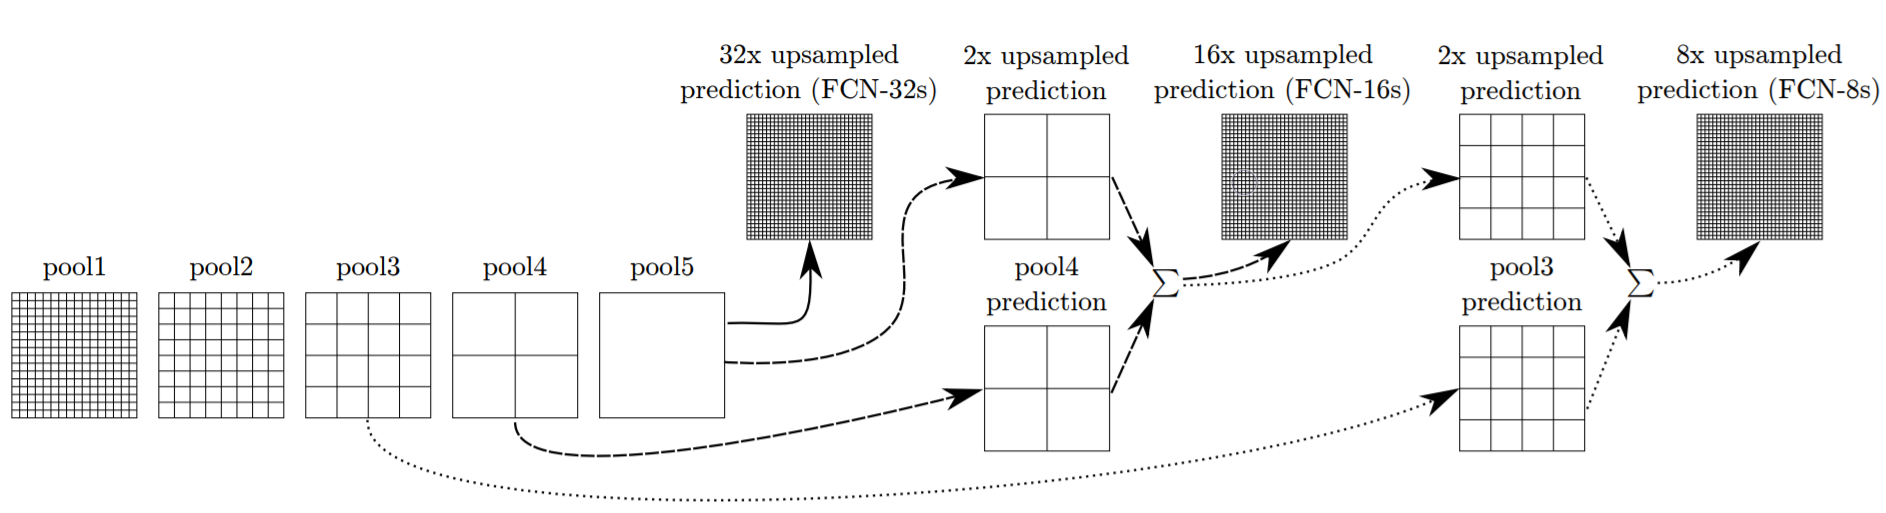

In [43]:
from IPython import display
display.Image('https://mohitjainweb.files.wordpress.com/2018/09/fcn-skip-connections1.png')

In [21]:
# import packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
# using the pre-trained vgg16 algorithm
from tensorflow.keras.applications.vgg16 import *

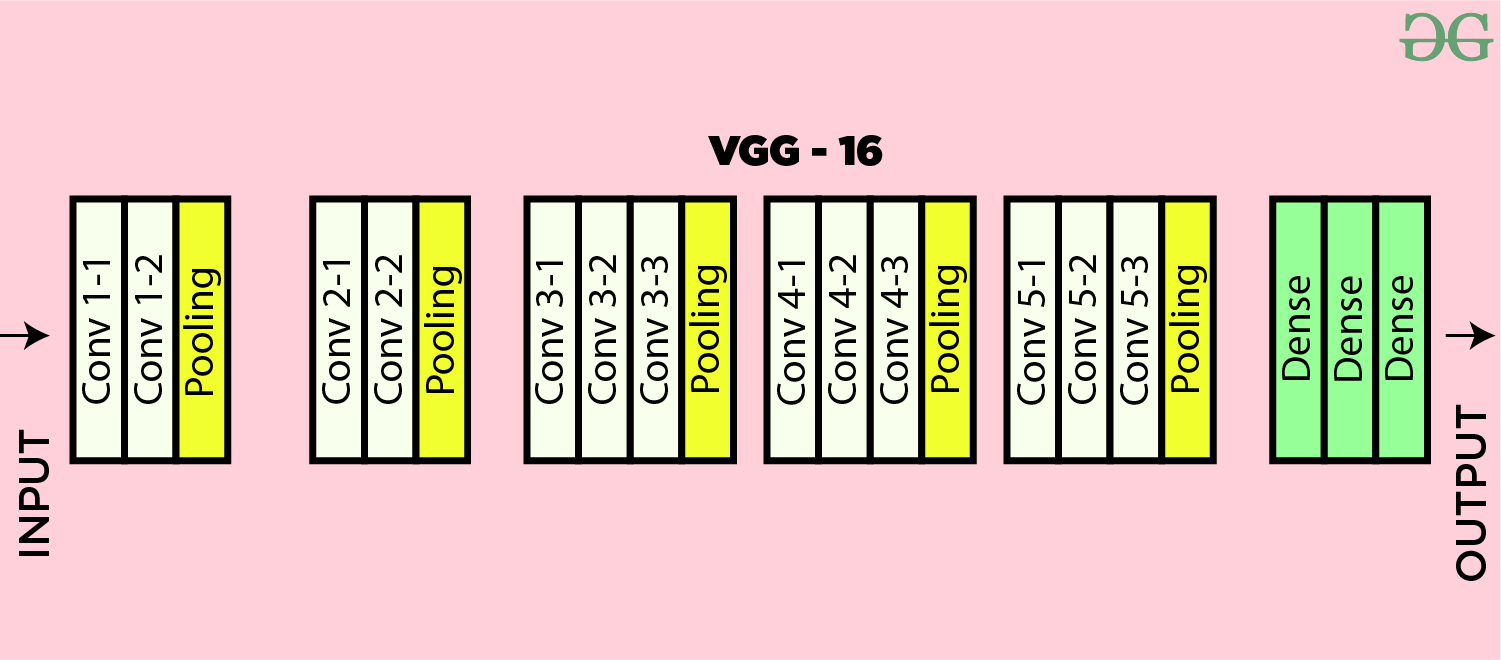

In [45]:
# vgg16 architecture
display.Image('https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg')
# documentation: https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

In [22]:
def fcn(image_size = 128, ch_in=3, ch_out=3):
    
    #initiating an keras tensor
#     inputs = Input(shape=(*image_size, ch_in), name='input')
    inputs = Input((image_size, image_size, ch_in))
    # calling the pre-trained vgg-16 model
    vgg16 = VGG16(
        include_top=False, # not including the 3 dense layers
        weights='imagenet', # applying weights from pre-trained imagenet networks
        input_tensor=inputs, # keras tensor as model input
        input_shape= (128,128,3))

    # extracting the outputs of pool3, pool4, pool5
    f3 = vgg16.get_layer('block3_pool').output  
    f4 = vgg16.get_layer('block4_pool').output  
    f5 = vgg16.get_layer('block5_pool').output  
    
    # creating the rest of the convlution and pooling layers
    f6 = Conv2D(filters=4086, kernel_size=7, padding='same',
                      activation='relu')(f5)
    f6_drop = Dropout(0.5)(f6) # add dropout layer to reduce overfitting, parameters can be fine-tuned
    f7 = Conv2D(filters=4086, kernel_size=1, padding='same',
                      activation='relu')(f6_drop)
    f7_drop = Dropout(0.5)(f7)
    f8 = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f7_drop)

    # merging the layers
    # transposing pool5 to be merged with prediction from pool4
    f5_transpose = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2,
                                use_bias=False, padding='same', activation='relu')(f5)
    # convolution of pool4
    f4_conv = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f4)
    # Merging the 2 feature maps:
    merge_1 = add([f4_conv, f5_transpose])

    # transposing output from merge_1 to be merged with prediction from pool3
    merge_1_transpose = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2,
                                use_bias=False, padding='same', activation='relu')(merge_1)
    # convolution of pool3
    f3_conv = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f3)
    # Merging the 2 feature maps:
    merge2 = add([f3_conv, merge_1_transpose])

    # Transpose to decode and up-scale feature map (28x28) to the original shape (224x224)
    # stride = 224 / 28 = 8
    outputs = Conv2DTranspose(filters=ch_out, kernel_size=16, strides=8,
                              padding='same', activation=None)(merge2)
    
    fcn_model = Model(inputs, outputs)
    return fcn_model

In [128]:
# configure model for training - loss function is MSE
import tensorflow as tf
model = fcn(128)

# problem: Large (exploding) gradients that result in a large update to network weights during training -
# so use gradient clipping so that your gradients have a certain “maximum allowed model update”

# all parameter gradients will be clipped to a maximum value of 0.5 and a minimum value of -0.5.
rsmprop = tf.keras.optimizers.RMSprop(clipvalue=0.5)

model.compile(optimizer=rsmprop,
              loss='mse',
              metrics=[tf.keras.metrics.BinaryCrossentropy()])

In [131]:
#meaning of results:

# Cross-Entropy = 0.00: Perfect probabilities.
# Cross-Entropy < 0.02: Great probabilities.
# Cross-Entropy < 0.05: On the right track.
# Cross-Entropy < 0.20: Fine.
# Cross-Entropy > 0.30: Not great.
# Cross-Entropy > 1.00: Terrible.
# Cross-Entropy > 2.00 Something is broken.

# Loss: the lower the loss, the closer our predictions are to the true labels.

results = model.fit(x = train_data_clean, y = train_mask_clean, 
                    batch_size=4, 
                    epochs=20)

Epoch 1/20
805/805 [==============================] - 406s 504ms/step - loss: 0.3183 - binary_crossentropy: -11.0147
Epoch 2/20
805/805 [==============================] - 415s 515ms/step - loss: 0.2255 - binary_crossentropy: -11.3903
Epoch 3/20
805/805 [==============================] - 408s 506ms/step - loss: 0.1902 - binary_crossentropy: -11.5238
Epoch 4/20
805/805 [==============================] - 411s 511ms/step - loss: 0.1673 - binary_crossentropy: -11.5875
Epoch 5/20
805/805 [==============================] - 413s 513ms/step - loss: 0.1479 - binary_crossentropy: -11.6190
Epoch 6/20
805/805 [==============================] - 408s 507ms/step - loss: 0.1360 - binary_crossentropy: -11.6392
Epoch 7/20
805/805 [==============================] - 412s 512ms/step - loss: 0.1287 - binary_crossentropy: -11.6472
Epoch 8/20
805/805 [==============================] - 412s 511ms/step - loss: 0.1227 - binary_crossentropy: -11.6491
Epoch 9/20
805/805 [==============================] - 421s 523ms

In [153]:
model.evaluate(
    x=val_data_clean,
    y=val_mask_clean,
)

101/101 [==============================] - 103s 1s/step - loss: 0.0784 - binary_crossentropy: -11.8345


[0.07840314507484436, -11.834543228149414]

In [200]:
prediction = model.predict(val_data_clean)
prediction

array([[[[1.8939873 , 1.8939873 , 1.8939873 ],
         [1.9237514 , 1.9237514 , 1.9237514 ],
         [1.941941  , 1.941941  , 1.941941  ],
         ...,
         [1.9037299 , 1.9037299 , 1.9037299 ],
         [1.8779461 , 1.8779461 , 1.8779461 ],
         [1.8453138 , 1.8453138 , 1.8453138 ]],

        [[1.9211346 , 1.9211346 , 1.9211346 ],
         [1.9543647 , 1.9543647 , 1.9543647 ],
         [1.9778244 , 1.9778244 , 1.9778244 ],
         ...,
         [1.9651722 , 1.9651722 , 1.9651722 ],
         [1.9285332 , 1.9285332 , 1.9285332 ],
         [1.8869092 , 1.8869092 , 1.8869092 ]],

        [[1.9342027 , 1.9342027 , 1.9342027 ],
         [1.9696354 , 1.9696354 , 1.9696354 ],
         [1.9972153 , 1.9972153 , 1.9972153 ],
         ...,
         [2.0072336 , 2.0072336 , 2.0072336 ],
         [1.9658347 , 1.9658347 , 1.9658347 ],
         [1.9167655 , 1.9167655 , 1.9167655 ]],

        ...,

        [[1.7587667 , 1.7587667 , 1.7587667 ],
         [1.7760801 , 1.7760801 , 1.7760801 ]

In [164]:
# function for showing sample images and its mask from the dataset
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# function to create the mask
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]


# function to show the prediction
def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
        create_mask(model.predict(sample_image[tf.newaxis, ...]))])

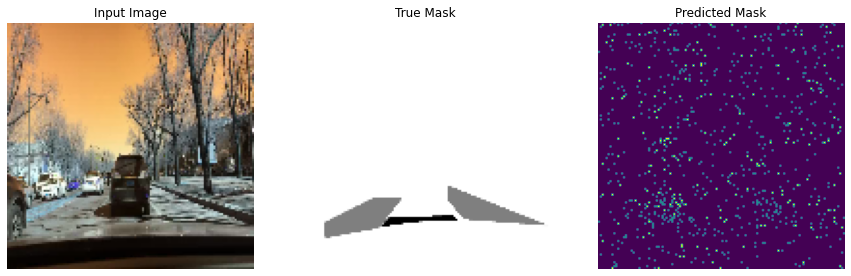

In [422]:
# train.take(1) method takes the first element f
for image in val_data_clean:
    sample_image = image
for image in train_mask_clean:
    sample_mask = image
show_predictions()

In [449]:
def ingest_2():
    for f in val_data_split['name']:
        if(f == 'b0521762-565e20cd.jpg'):
            image_path = f
            h = 720
            d = 1280
            ch = 3
            X = np.empty(shape = (len(image_path), h, d, ch), dtype = 'float32')
            y = np.empty(shape = (len(image_path), h, d, ch), dtype = 'float32')
            defaults = (('<pad>', 0), 'O')
            i = 0

            image_folder_path = "../Data/bdd100k/bdd100k 2/images/100k/val_clean/"
            mask_folder_path = "../Data/bdd100k/bdd100k 3/labels/drivable/masks/train_clean/" 

            f_temp = f
            f_temp = f_temp[:-4]
            f_png = (f_temp + '.png')

            image = cv2.imread(image_folder_path+f, cv2.IMREAD_COLOR)
            mask = cv2.imread(mask_folder_path+f_png, cv2.IMREAD_COLOR)

            X[i] = image
            y[i] = mask
            i+=1
    return X,y

val_data_test, val_mask_test = ingest_2()

val_data_test, val_mask_test = image_resize(val_data_test, val_mask_test)

print(val_mask_test.shape)
print(val_data_test.shape)

(21, 128, 128, 3)
(21, 128, 128, 3)


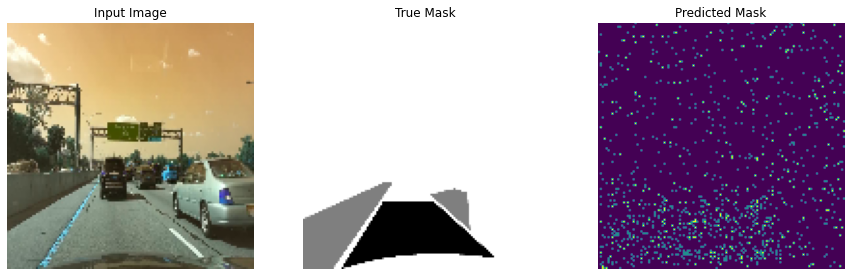

In [457]:
sample_image = val_data_test[0]
sample_mask = val_mask_test[0]
show_predictions()

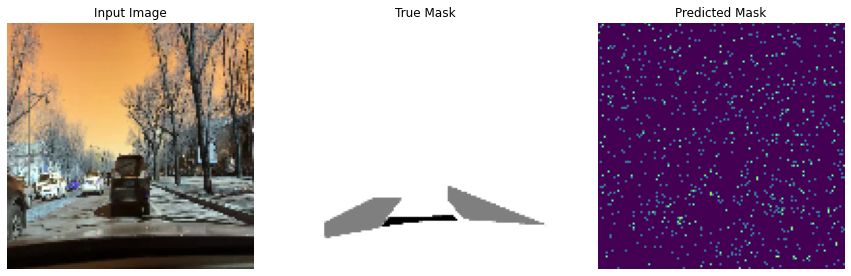


Sample Prediction after epoch 1

Epoch 2/50
22/25 [=========================>....] - ETA: 53s - loss: 0.0463 - binary_crossentropy: -12.0080 

KeyboardInterrupt: 

In [375]:
# calllback to displaying the predictions of our model while training
from IPython.display import clear_output

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))
   
 # ReduceLROnPlateau callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
# EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)

BUFFER_SIZE = 1000
BATCH_SIZE = 128
TRAIN_LENGTH = len(train_data_clean)
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
EPOCHS = 50
VAL_SUBSPLITS = 5
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = TRAIN_LENGTH//BATCH_SIZE//VAL_SUBSPLITS
    
model_history = model.fit(x = train_data_clean, y = train_mask_clean,
                          epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          callbacks=[DisplayCallback(), reduce_lr, early_stopping])

In [327]:
val_data_split['name']

105      004855fc-ff3946ad.jpg
115      0049e5b8-afda7206.jpg
159      006fdb67-f4820206.jpg
203      0081e27b-17bf4a9e.jpg
1259     03641c88-f519c8f8.jpg
                 ...          
68316    ae55d558-4b7bf95f.jpg
68985    afe7c43b-998729a8.jpg
69163    b0521762-565e20cd.jpg
69398    b0e4e52c-4b120046.jpg
69512    b11da8cd-f3134c04.jpg
Name: name, Length: 357, dtype: object

In [237]:
# define function to save predicted images
def save_image(array, filepath):
    j = 0
    for i in array:
        fn = 'file' + str(j)
        cv2.imwrite(filepath + fn + '.jpeg', i)
        j+=1

In [238]:
# define function to transform predicted images to greyscale by reloading images
def transform_grayscale(array, filepath):
    
    save_image(array, filepath)
    
    j = 0
    grayscale = np.empty(shape = (len(array), 128, 128), dtype = 'float32')
    for i in range(len(array)):
        fn = filepath + 'file' + str(j)
        im_gray = cv2.imread(fn+'.jpeg', cv2.IMREAD_GRAYSCALE)
        grayscale[j] = im_gray
        j=+1
    return grayscale

In [240]:
# get grayscale version of predicted images
filepath = '../Data/bdd100k/bdd100k 2/images/100k/predicted_val/'
grayscale_pred = transform_grayscale(prediction, filepath)

In [286]:
# define function to read image by greyscale
def read_grayscale(array, filepath, filename):
    j = 0
    grayscale = np.empty(shape = (len(array), 720, 1280), dtype = 'float32')
    for index, value in val_data_split['name'].items():
        fn = filepath + filename[index][:-4] +'.png'
        im_gray = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        grayscale[j] = im_gray
        j += 1
        
    
    grayscale_resize = np.empty(shape = (len(array), 128, 128), dtype = 'float32')

    for i in range(len(array)):
        image = cv2.resize(grayscale[i], (128,128))
    
        grayscale_resize[i] = image 
                                
    return grayscale_resize

In [ ]:
print(type(val_data_split['name']))

for index, value in val_data_split['name'].items():
    print(val_data_split['name'][index])
    j+=1

In [287]:
filepath = "../Data/bdd100k/bdd100k 3/labels/drivable/masks/val_clean/"
# @ Fidelia, use the val split [name] here for filename on your end
grayscale_mask = read_grayscale(val_data_split['name'], filepath, filename = val_data_split['name'])

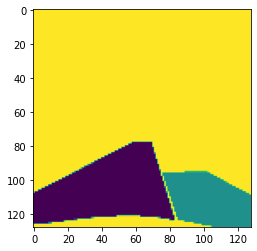

In [288]:
# check grayscale mask
plt.imshow(grayscale_mask[0])

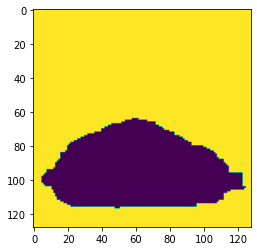

In [289]:
# check grayscale predicted image
plt.imshow(grayscale_pred[0])

In [312]:
# define function to classify pixel into drivable, non drivable and background
def classify(array, bins):
    classiflied = array.copy()
    for i in range(len(array)):
        classified_image = np.digitize(array[i],bins)
        classiflied[i] = classified_image
    reverse_classified = np.subtract(classiflied, 1).astype(dtype = bool).astype('int')
    return reverse_classified

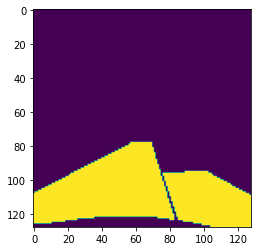

In [314]:
#classify into two bins (drivable and background)
bins = [2]
classified_mask = classify(grayscale_mask,bins)
classified_mask[0][-1]
plt.imshow(classified_mask[0])

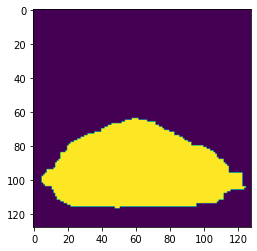

In [315]:
#classify into two bins (drivable and background)
bins = [2]
classified_pred = classify(grayscale_pred, bins)
classified_pred[0][-1]
plt.imshow(classified_pred[0])

# 5. Metrics

In [321]:
from statistics import mean

def evaluation(y_true, y_pred):
    
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    summary = {}
    
    for i in range(len(y_true)):
        
        acc = metrics.accuracy_score(y_true[i].flatten(), y_pred[i].flatten())
        recall = metrics.recall_score(y_true[i].flatten(), y_pred[i].flatten())
        precision = metrics.precision_score(y_true[i].flatten(), y_pred[i].flatten())
        f1_score = metrics.f1_score(y_true[i].flatten(), y_pred[i].flatten())

        accuracies.append(acc)
        recalls.append(recall)
        precisions.append(precision)
        f1_scores.append(f1_score)
        
    summary['accuracy'] = mean(accuracies)
    summary['recall'] = mean(recalls)
    summary['precision'] = mean(precisions)
    summary['f1_score'] = mean(f1_scores)
        
    return accuracies, precisions, recalls, f1_scores, summary

In [322]:
accuracies, precisions, recalls, f1_scores, summary = evaluation(classified_mask, classified_pred)

/Users/fidelianawar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [323]:
summary

{'accuracy': 0.02027392988445378,
 'recall': 0.08861432005338758,
 'precision': 0.017453388271765007,
 'f1_score': 0.027854133040857952}